# 不同亮度下白点的坐标

看看屏幕在同样的纯白下（RGB：0,0,0），不同的亮度条件测出来的光谱有无变化

## 导入6组白光数据，生成光谱类实例

In [1]:
import os
os.getcwd()

In [2]:
os.chdir('..')
os.getcwd()

'/home/edward/Documents/Major'

In [3]:
lst = [x for x in os.listdir('./spec_info/2018_10_05/') if x.startswith('white')]
lst.sort()
print(lst)

['white1_2018_10_05_16_36_21.sp', 'white2_2018_10_05_16_41_49.sp', 'white3_2018_10_05_16_45_43.sp', 'white4_2018_10_05_16_50_30.sp', 'white5_2018_10_05_16_53_33.sp', 'white6_2018_10_05_16_56_31.sp']


In [4]:
lst = [os.path.join('/home/edward/Documents/Major/spec_info/2018_10_05/', x) for x in lst]
print(lst)

['/home/edward/Documents/Major/spec_info/2018_10_05/white1_2018_10_05_16_36_21.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/white2_2018_10_05_16_41_49.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/white3_2018_10_05_16_45_43.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/white4_2018_10_05_16_50_30.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/white5_2018_10_05_16_53_33.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/white6_2018_10_05_16_56_31.sp']


In [5]:
from spectool import *

/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "x" independent variable is not uniform, unpredictable results may occur!
  warn(*args, **kwargs)


In [6]:
os.getcwd()

'/home/edward/Documents/Major'

In [7]:
white1 = Spectrum(lst[0], 'white1')
white2 = Spectrum(lst[1], 'white2')
white3 = Spectrum(lst[2], 'white3')
white4 = Spectrum(lst[3], 'white4')
white5 = Spectrum(lst[5], 'white5')
white6 = Spectrum(lst[4], 'white6')
spec_list = [white1, white2, white3, white4, white5, white6]

/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "domain" and "range" variables have different size, "range" variable will be resized to "domain" variable shape!
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "D65" illuminant shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "white1" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "white2" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching fu

In [8]:
spec_list = [white1, white2, white3, white4, white5, white6]

## 显示他们的亮度

In [9]:
L_lst = []
for spec in spec_list:
    L_lst.append(spec.get('L'))
    print(spec.name, "|", spec.get('L'), 'cd/m2')

white1 | 15.193319 cd/m2
white2 | 37.210155 cd/m2
white3 | 84.344246 cd/m2
white4 | 130.46425 cd/m2
white5 | 232.61462 cd/m2
white6 | 340.93872 cd/m2


## 亮度变化可视化

In [10]:
from pyecharts import Bar

In [11]:
attr = ['white1', 'white2', 'white3', 'white4', 'white5', 'white6']
bar = Bar("亮度变化", "六个白点样本的亮度")
bar.add("亮度值（cd/m2）", attr, L_lst, is_label_show=True)

## 显示样本的xy坐标

In [12]:
data = {
    'white1': {'x': white1.x,'y': white1.y}, 
    'white2': {'x': white2.x,'y': white2.y},
    'white3': {'x': white3.x,'y': white3.y},
    'white4': {'x': white4.x,'y': white4.y},
    'white5': {'x': white5.x,'y': white5.y},
    'white6': {'x': white6.x,'y': white6.y}
}
spec_xy = pd.DataFrame(data).T
print(spec_xy)

               x         y
white1  0.297340  0.312955
white2  0.303679  0.314731
white3  0.303256  0.314714
white4  0.303257  0.314404
white5  0.305334  0.313428
white6  0.305435  0.313877


In [13]:
spec_xy.loc[:,'x'].values

array([0.29733986, 0.30367905, 0.30325556, 0.30325654, 0.30533394,
       0.30543542])

In [14]:
from pyecharts import Line

In [15]:
v1 = list(spec_xy.loc[:,'x'].values)
v2 = list(spec_xy.loc[:,'y'].values)
attr = [str(x) for x in L_lst]
line = Line("白点随亮度变化的坐标变化")
line.add("x", attr, v1,mark_line=['average'])
line.add("y", attr, v2,mark_line=['average'])


## **结论：** 可以看出亮度基本不对白点坐标造成影响, 6个样本的x，y值的平均值分别为（0.3, 0.31）

## 将六个白点样本绘制在CIE1931图上

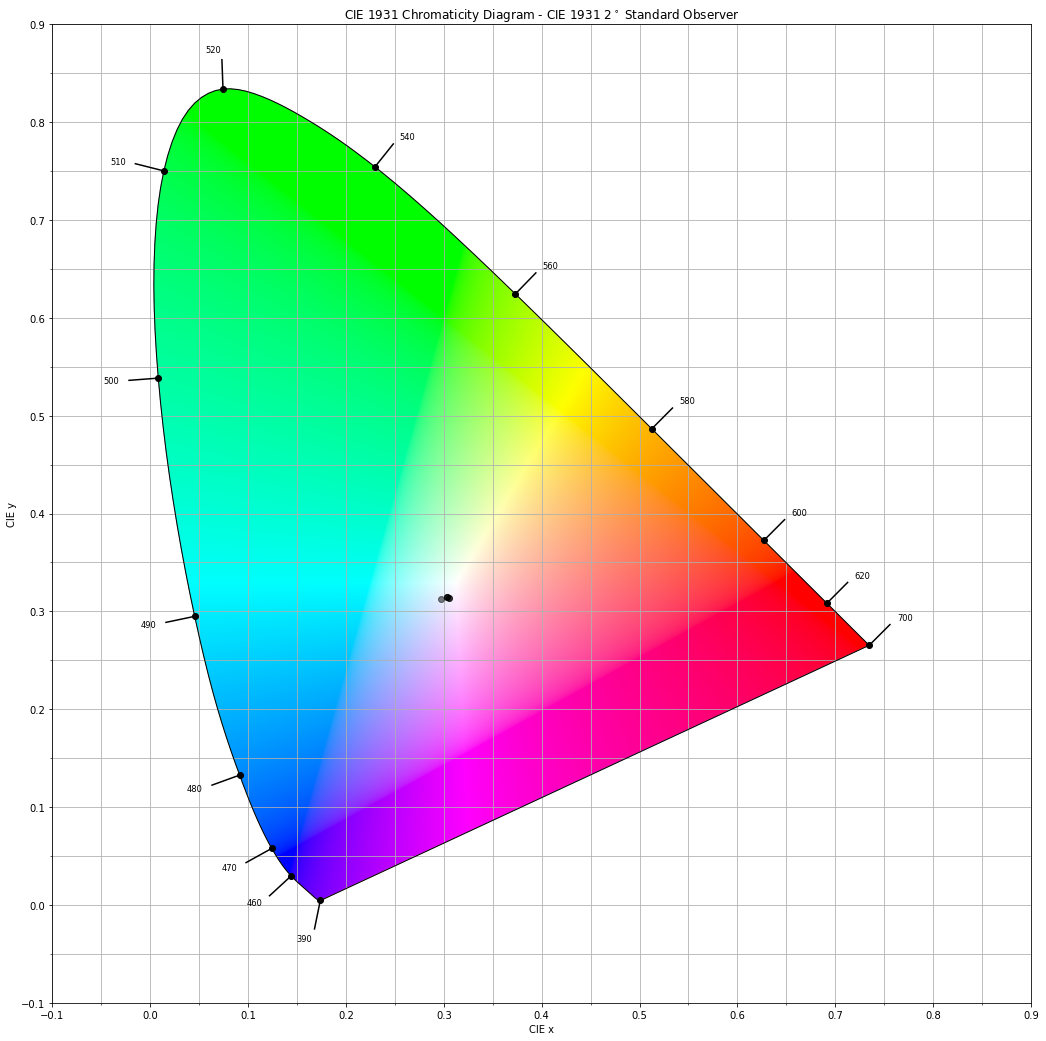

In [16]:
spcs_in_one_diagram(*spec_list)

## 总结： 在后续的实验研究过程中，白点坐标取值（0.3, 0.31），不考虑亮度对其坐标值的影响

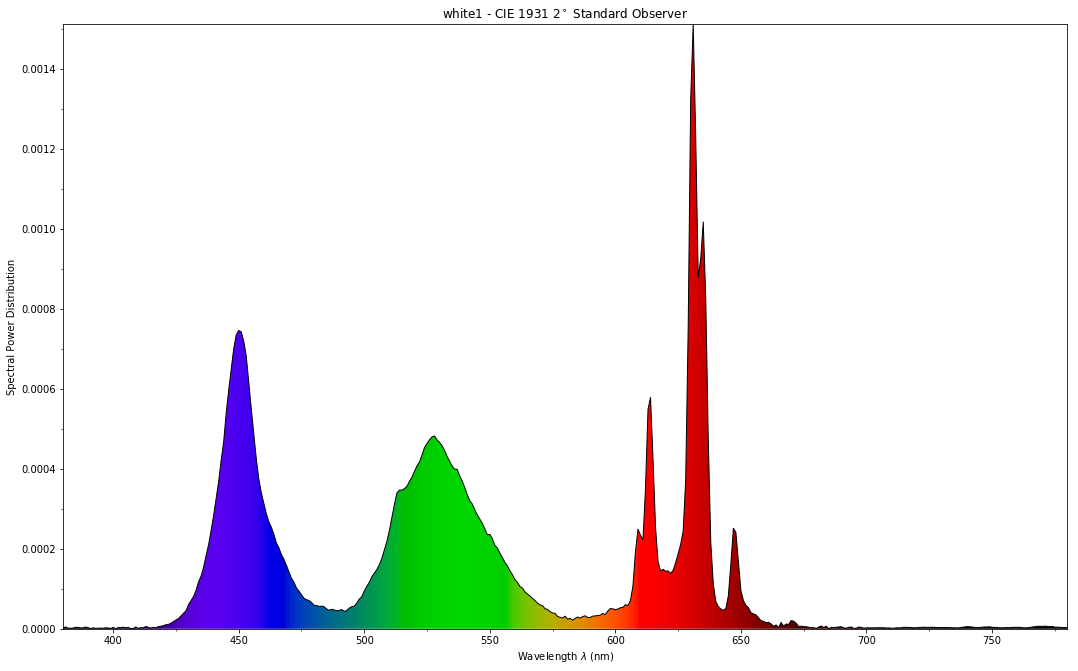

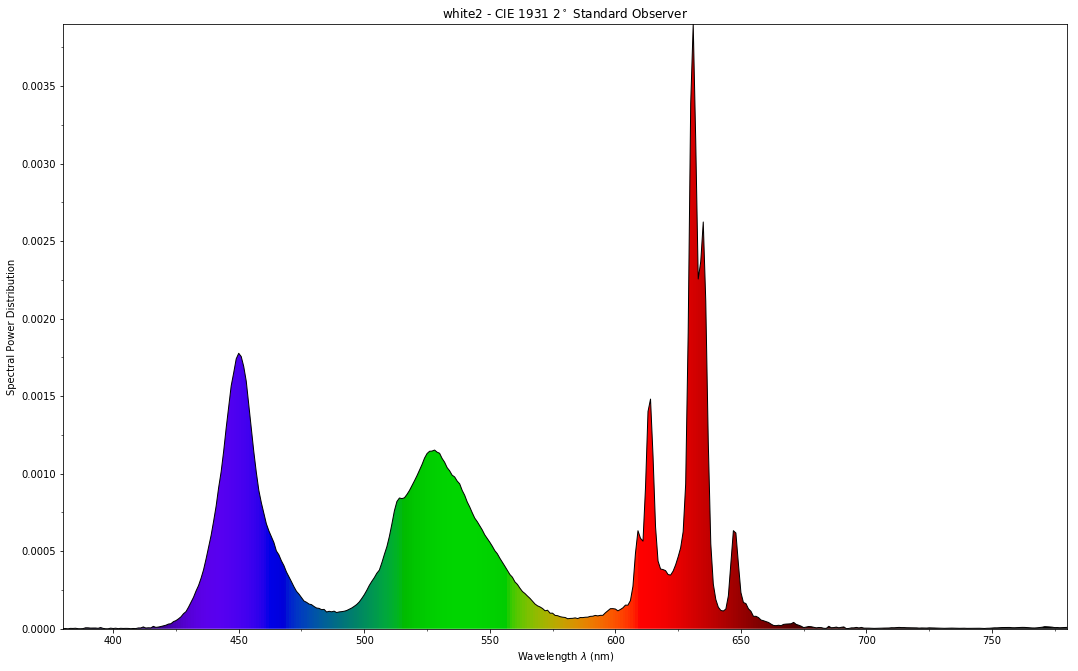

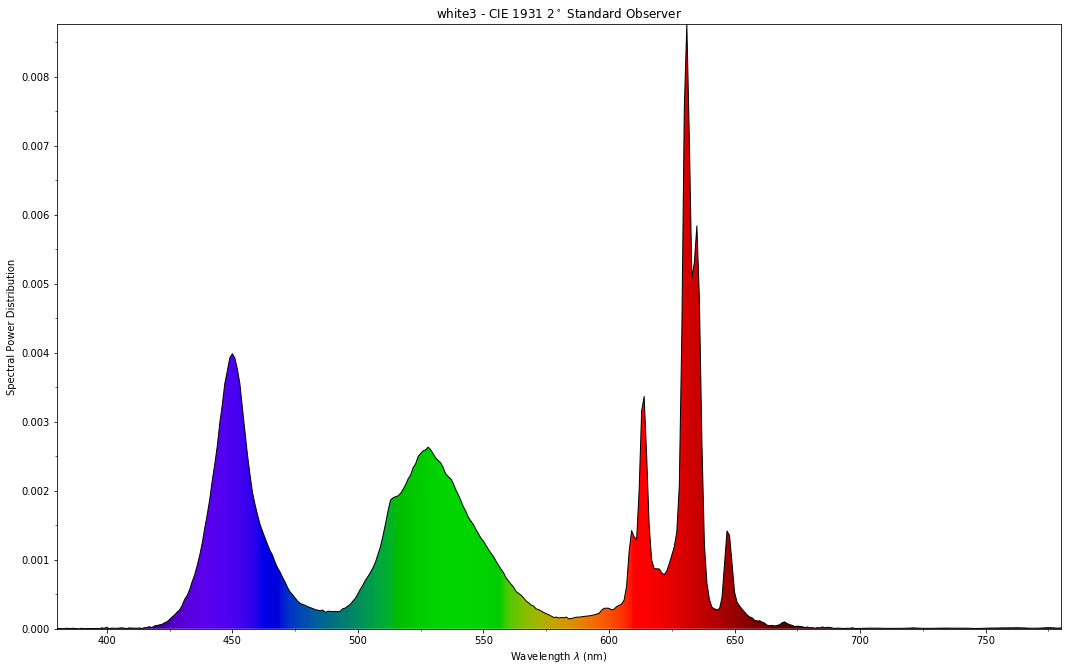

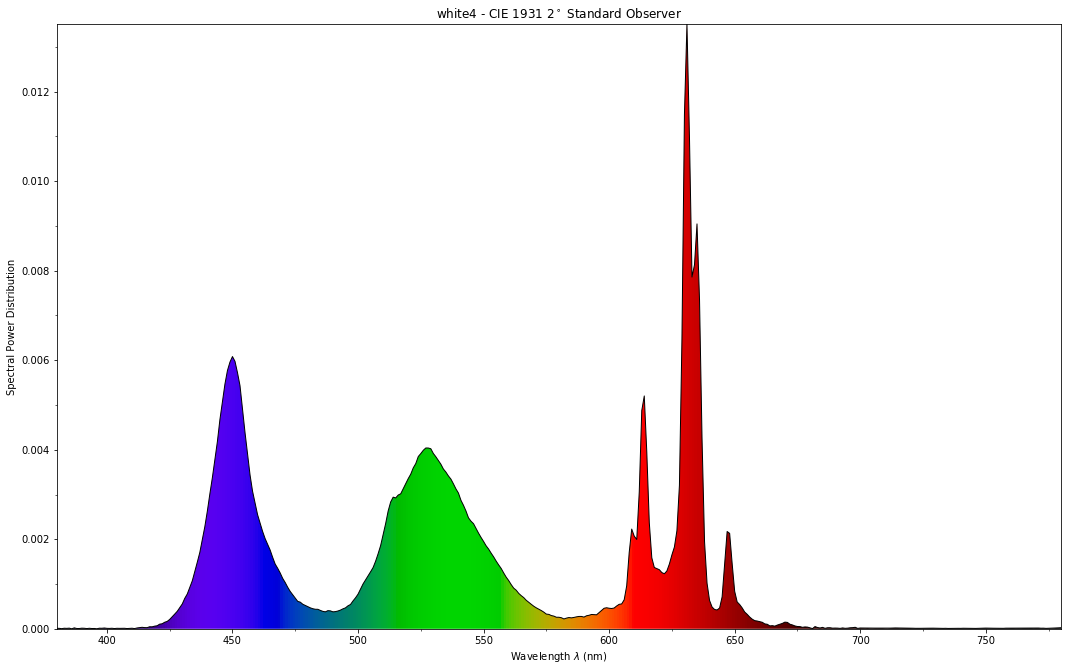

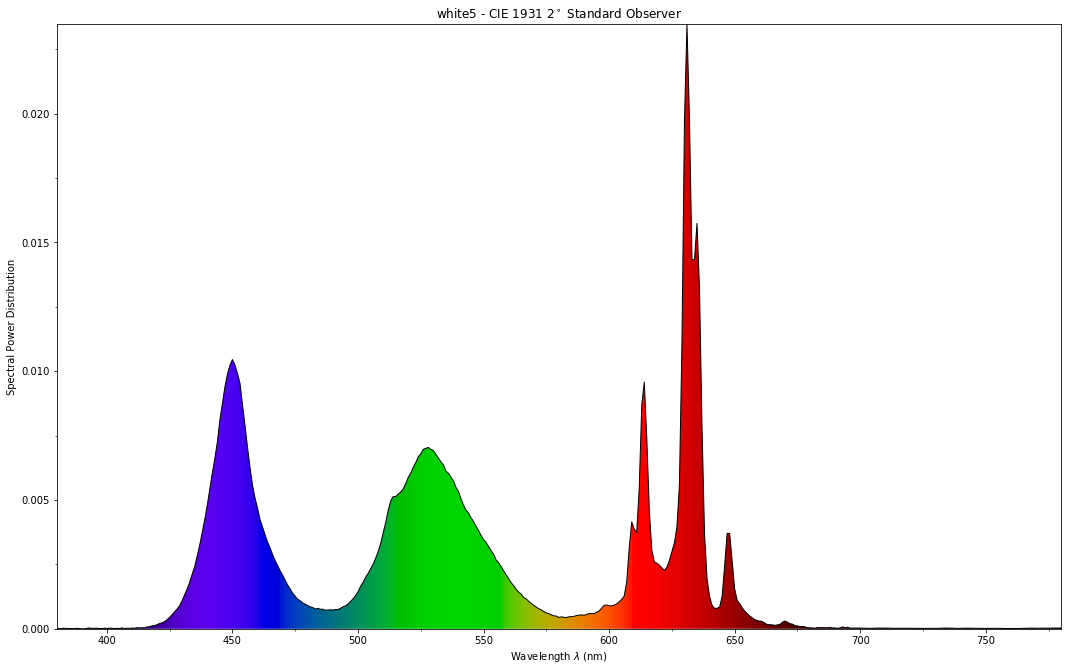

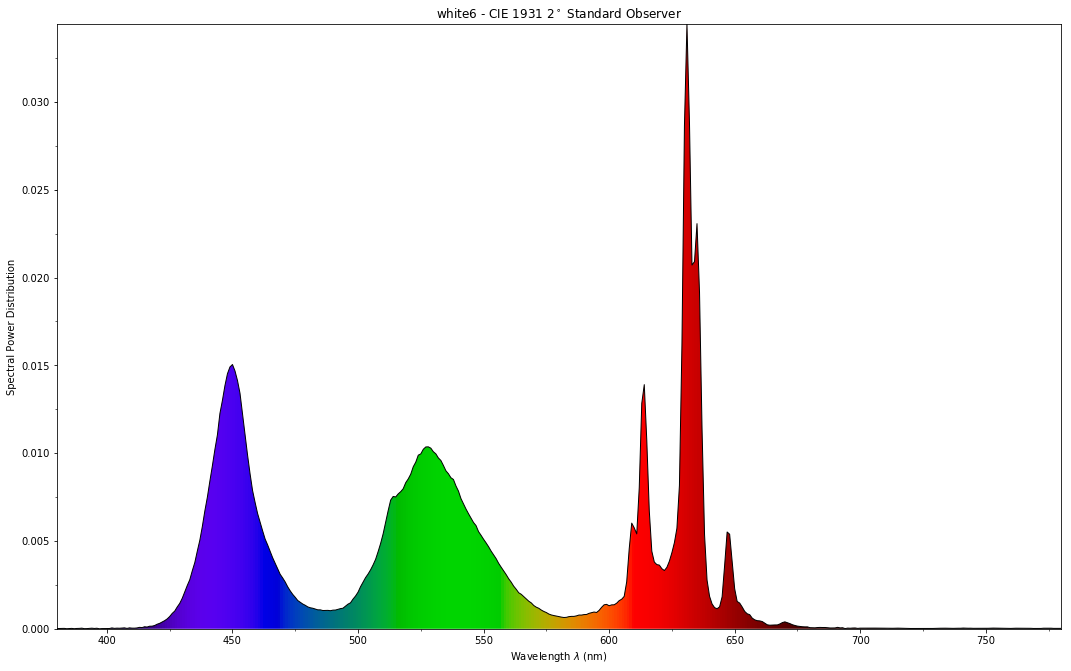

In [17]:
for spec in spec_list:
    spec.spd_plot()